In [62]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [63]:
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
sns.set_style("whitegrid")

In [64]:
# Load csv 
try:
    df = pd.read_csv("mqtt_test_results.csv", on_bad_lines='warn', header=0)
except FileNotFoundError:
    print("Error: mqtt_test_results.csv not found.")
    exit()

expected_cols = len(df.columns)

cols_to_make_numeric = [
    "Analyzer_sub_QoS", "Publisher_pub_QoS", "Publisher_delay_ms",
    "Publisher_msg_size_bytes", "Publisher_instance_count_cfg",
    "Total_msgs_received_by_analyzer", "Mean_total_rate_mps_analyzer",
    "Avg_loss_pct_per_active_pub", "Avg_outoforder_pct_per_active_pub",
    "Avg_dup_pct_per_active_pub", "Avg_inter_msg_gap_ms_per_active_pub",
    "Avg_stddev_inter_msg_gap_ms_per_active_pub",
    "SYS_load_messages_received_1min_last", "SYS_load_messages_sent_1min_last",
    "SYS_clients_active_last", "SYS_messages_stored_last",
    "SYS_subscriptions_count_last"
]

for col in cols_to_make_numeric:
    if col in df.columns: 
        df[col] = pd.to_numeric(df[col], errors='coerce')

def remove_extra_values(row):
    if len(row.dropna()) > expected_cols:
        return row.iloc[:expected_cols] # Truncate the row
    return row

df_raw = pd.read_csv("mqtt_test_results.csv", header=None, on_bad_lines='warn')
processed_df = df_raw.apply(remove_extra_values, axis=1, result_type='broadcast')

header = [
    "Test_Run_Timestamp",
    "Analyzer_sub_QoS",
    "Publisher_pub_QoS",
    "Publisher_delay_ms",
    "Publisher_msg_size_bytes",
    "Publisher_instance_count_cfg",
    "Total_msgs_received_by_analyzer",
    "Mean_total_rate_mps_analyzer",
    "Avg_loss_pct_per_active_pub",
    "Avg_outoforder_pct_per_active_pub",
    "Avg_dup_pct_per_active_pub",
    "Avg_inter_msg_gap_ms_per_active_pub",
    "Avg_stddev_inter_msg_gap_ms_per_active_pub",
    "SYS_load_messages_received_1min_last",
    "SYS_load_messages_sent_1min_last",
    "SYS_clients_active_last",
    "SYS_messages_stored_last",
    "SYS_subscriptions_count_last",
]
processed_df.columns = header

df = processed_df

# Display first few rows
print("Dataframe:")
df.info()
# print("\nFirst 5 rows of the DF:")
# print(df.head())
print(f"\nTotal number of test runs loaded: {len(df)}")

Dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 18 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Test_Run_Timestamp                          168 non-null    object
 1   Analyzer_sub_QoS                            168 non-null    object
 2   Publisher_pub_QoS                           168 non-null    object
 3   Publisher_delay_ms                          168 non-null    object
 4   Publisher_msg_size_bytes                    168 non-null    object
 5   Publisher_instance_count_cfg                168 non-null    object
 6   Total_msgs_received_by_analyzer             168 non-null    object
 7   Mean_total_rate_mps_analyzer                168 non-null    object
 8   Avg_loss_pct_per_active_pub                 168 non-null    object
 9   Avg_outoforder_pct_per_active_pub           168 non-null    object
 10  Avg_dup_pct_per

/var/folders/by/0tg5l6wj7g5bb2fr6pb_1p200000gn/T/ipykernel_55451/350734953.py:3: ParserWarning: Skipping line 7: expected 18 fields, saw 19
Skipping line 8: expected 18 fields, saw 19
Skipping line 171: expected 18 fields, saw 19
Skipping line 172: expected 18 fields, saw 19

  df = pd.read_csv("mqtt_test_results.csv", on_bad_lines='warn', header=0)
/var/folders/by/0tg5l6wj7g5bb2fr6pb_1p200000gn/T/ipykernel_55451/350734953.py:15: ParserWarning: Skipping line 7: expected 18 fields, saw 19
Skipping line 8: expected 18 fields, saw 19
Skipping line 171: expected 18 fields, saw 19
Skipping line 172: expected 18 fields, saw 19

  df_raw = pd.read_csv("mqtt_test_results.csv", header=None, on_bad_lines='warn')


In [65]:
# Data cleaning and preprocessing 

# Replace N/A to NaN
sys_cols_to_convert = [
    "SYS_load_messages_received_1min_last",
    "SYS_load_messages_sent_1min_last",
    "SYS_clients_active_last",
    "SYS_messages_stored_last",
    "SYS_subscriptions_count_last",
]

for col in sys_cols_to_convert:
    if col in df.columns: 
        df[col] = pd.to_numeric(df[col], errors='coerce')

print(df['SYS_clients_active_last'].value_counts(dropna=False))

SYS_clients_active_last
NaN     159
3.0       4
12.0      4
5.0       1
Name: count, dtype: int64


In [67]:
# Filtering out unreliable tests due to RAM limitations 
# Filter Total_msgs_received_by_analyzer where loss is not 100% and some
# messages were received 
df_new = df[(df['Total_msgs_received_by_analyzer'] > 0) & (df['Avg_loss_pct_per_active_pub'] < 100)].copy()

print(f"\nNumber of rows in original DataFrame: {len(df)}")
print(f"Number of rows in new df where Total_msgs_received_by_analyzer > 0: {len(df_new)}")


Number of rows in original DataFrame: 168
Number of rows in new df where Total_msgs_received_by_analyzer > 0: 15


In [68]:
# Display first few rows
print("Dataframe:")
df_new.info()
# print("\nrows of the DF:")
# print(df_new)
print(f"\nTotal number of test runs loaded: {len(df_new)}")

Dataframe:
<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 4 to 117
Data columns (total 18 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Test_Run_Timestamp                          15 non-null     object 
 1   Analyzer_sub_QoS                            15 non-null     object 
 2   Publisher_pub_QoS                           15 non-null     object 
 3   Publisher_delay_ms                          15 non-null     object 
 4   Publisher_msg_size_bytes                    15 non-null     object 
 5   Publisher_instance_count_cfg                15 non-null     object 
 6   Total_msgs_received_by_analyzer             15 non-null     float64
 7   Mean_total_rate_mps_analyzer                15 non-null     object 
 8   Avg_loss_pct_per_active_pub                 15 non-null     float64
 9   Avg_outoforder_pct_per_active_pub           15 non-null     float64
 10  Avg_dup_p

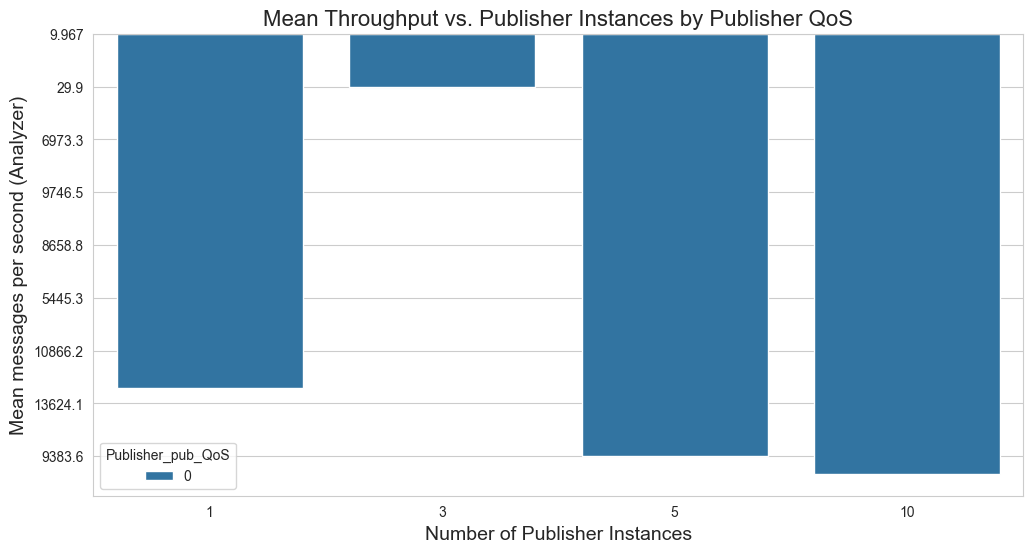

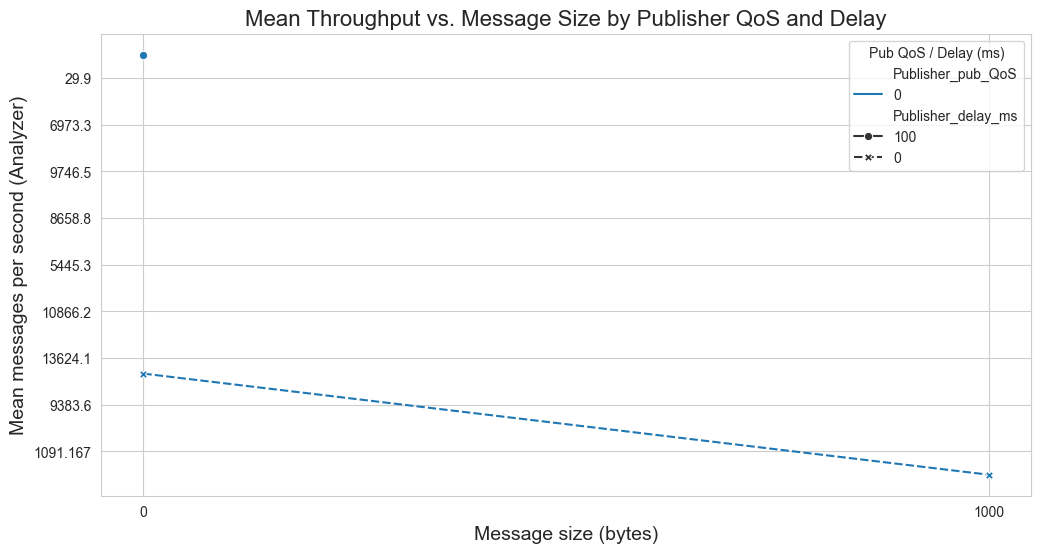

In [69]:
# Throughput Analysis

plt.figure()
sns.barplot(data=df_new,
           x="Publisher_instance_count_cfg",
           y="Mean_total_rate_mps_analyzer",
           hue="Publisher_pub_QoS", errorbar=None)
plt.title('Mean Throughput vs. Publisher Instances by Publisher QoS')
plt.xlabel('Number of Publisher Instances')
plt.ylabel("Mean messages per second (Analyzer)")
plt.show()
plt.figure()
sns.lineplot(data=df_new,
            x="Publisher_msg_size_bytes",
            y="Mean_total_rate_mps_analyzer",
            hue="Publisher_pub_QoS", style="Publisher_delay_ms", markers=True, errorbar=None)
plt.title("Mean Throughput vs. Message Size by Publisher QoS and Delay")
plt.xlabel("Message size (bytes)")
plt.ylabel("Mean messages per second (Analyzer)")
plt.legend(title="Pub QoS / Delay (ms)")
plt.show()

# 0ms delay tests 
df_0_delay = df[df['Publisher_delay_ms'] == 0].copy()
if not df_0_delay.empty:
    plt.figure()
    sns.lineplot(data=df_0_delay,
                x="Publisher_instance_count_cfg",
                y="Mean_total_rate_mps_analyzer",
                hue="Publisher_msg_size_bytes",
                style="Publisher_pub_QoS", markers=True, errorbar=None)
    plt.title("0ms Delay: Mean Throughput vs. Instances by Message Size and Pub QoS")
    plt.xlabel("Number of Publisher Instances")
    plt.ylabel("Mean messages per second (Analyzer)")
    plt.legend(title="Msg Size / Pub QoS")
    plt.show()

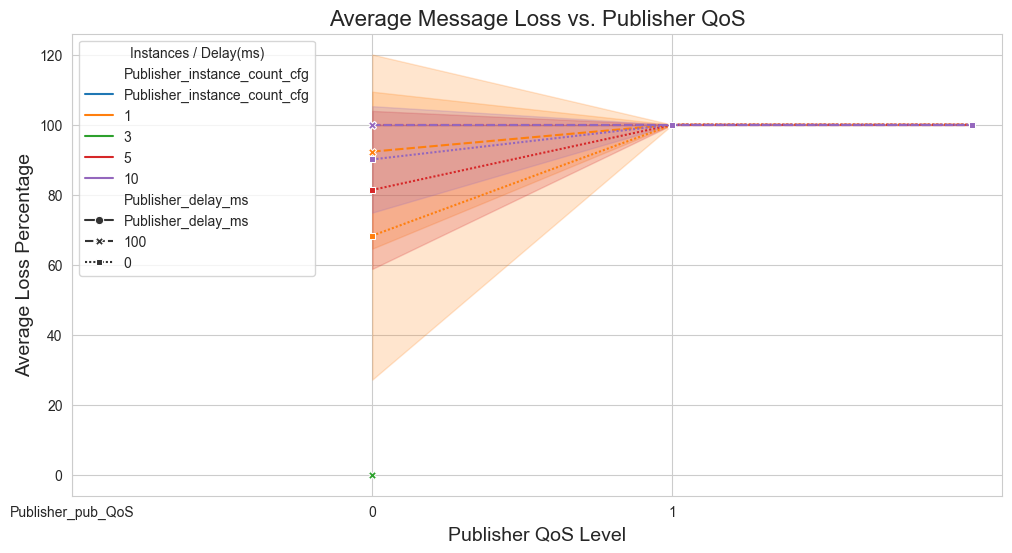

<Figure size 1200x600 with 0 Axes>

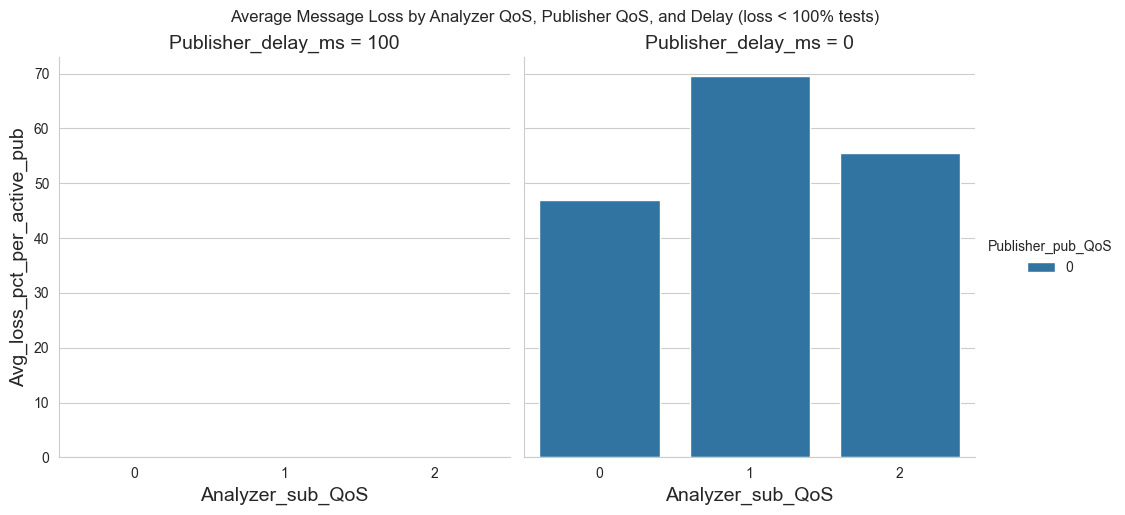

In [70]:
# Loss Analysis (use full df)
plt.figure()
sns.lineplot(data=df, x="Publisher_pub_QoS", y="Avg_loss_pct_per_active_pub",
            hue="Publisher_instance_count_cfg", style="Publisher_delay_ms", markers=True, errorbar="sd")
plt.title("Average Message Loss vs. Publisher QoS")
plt.xlabel("Publisher QoS Level")
plt.ylabel("Average Loss Percentage")
plt.xticks([0,1,2])
plt.legend(title="Instances / Delay(ms)")
plt.show()

# Compare Analyzer QoS effect on loss 
plt.figure()
sns.catplot(data=df_new, x="Analyzer_sub_QoS", y="Avg_loss_pct_per_active_pub",
            hue="Publisher_pub_QoS", kind="bar", col="Publisher_delay_ms", errorbar=None)
plt.suptitle("Average Message Loss by Analyzer QoS, Publisher QoS, and Delay (loss < 100% tests)", y=1.02)
plt.show()


Tests with Out-of-Order Messages:


<Figure size 1200x600 with 0 Axes>

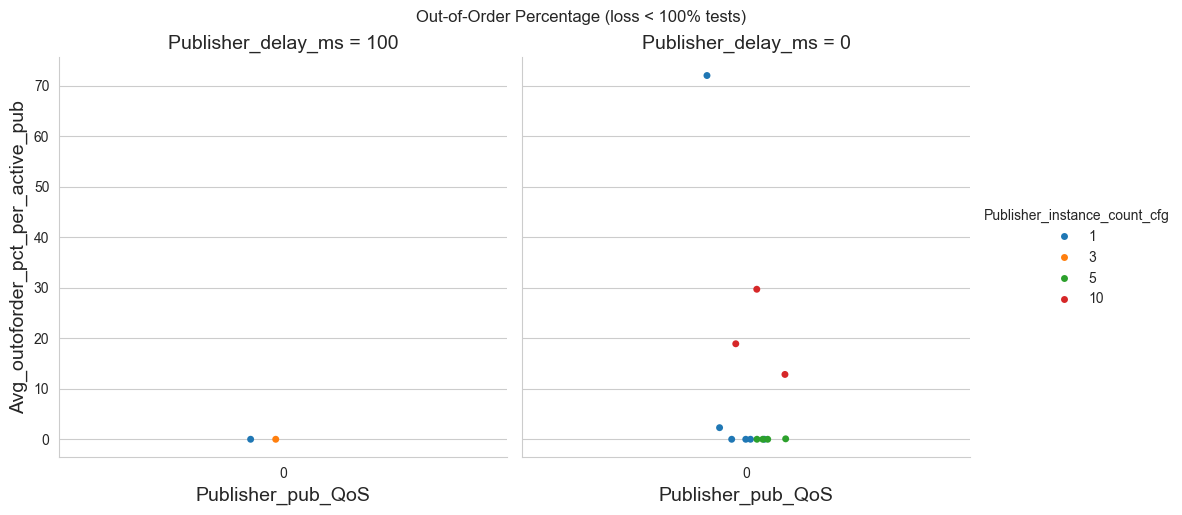

In [80]:
# Out-of-order Analysis
df_ooo = df_new[df_new['Avg_outoforder_pct_per_active_pub'] > 0]
print("\nTests with Out-of-Order Messages:")
# print(df_ooo[["Analyzer_sub_QoS", "Publisher_pub_QoS", 
#               "Publisher_delay_ms", 'Publisher_instance_count_cfg', 
#               'Avg_outoforder_pct_per_active_pub']].sort_values(by="Avg_outoforder_pct_per_active_pub",
#                                                                 ascending=False))
plt.figure()
sns.catplot(data=df_new,
            x="Publisher_pub_QoS",
            y="Avg_outoforder_pct_per_active_pub",
            hue="Publisher_instance_count_cfg", kind="strip",
            col="Publisher_delay_ms", jitter=True)
plt.suptitle("Out-of-Order Percentage (loss < 100% tests)", y=1.02)
plt.show()


Tests with Duplicate Messages:
   Analyzer_sub_QoS Publisher_pub_QoS Publisher_delay_ms  \
64                1                 0                  0   

   Publisher_instance_count_cfg  Avg_dup_pct_per_active_pub  
64                            5                       0.079  


<Figure size 1200x600 with 0 Axes>

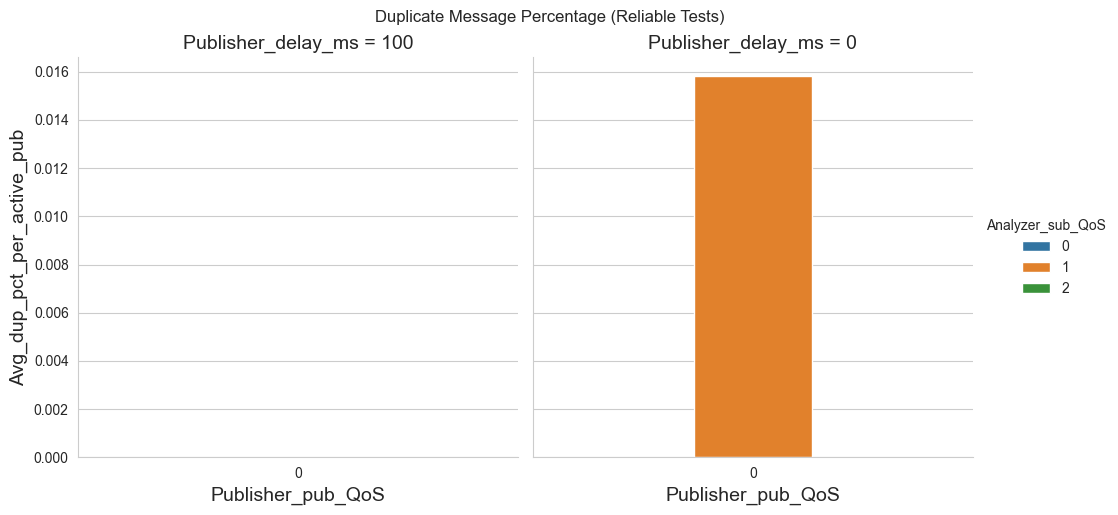

In [77]:
# Duplicate Message Analysis
df_dup = df_new[df_new["Avg_dup_pct_per_active_pub"] > 0]

if not df_dup.empty:
    print("\nTests with Duplicate Messages:")
    print(df_dup[['Analyzer_sub_QoS', 'Publisher_pub_QoS', 
                  'Publisher_delay_ms', 'Publisher_instance_count_cfg', 
                  'Avg_dup_pct_per_active_pub']].sort_values(by='Avg_dup_pct_per_active_pub', 
                                                             ascending=False))
    plt.figure()
    sns.catplot(data=df_new, 
                x="Publisher_pub_QoS",
                y="Avg_dup_pct_per_active_pub",
                hue="Analyzer_sub_QoS", kind="bar",
                col="Publisher_delay_ms", errorbar=None)
    plt.suptitle('Duplicate Message Percentage (Reliable Tests)', y=1.02)
    plt.show()
else:
    print("\nNo duplicate messages recorded in reliable tests (or all were 0%).")


In [79]:
# Inter-Message Gap Analysis
df_100ms_delay = df[df["Publisher_delay_ms"] == 100]
if not df_100ms_delay.empty:
    plt.figure()
    sns.boxplot(data=df_100ms_delay, 
                x='Publisher_instance_count_cfg', 
                y='Avg_inter_msg_gap_ms_per_active_pub', 
                hue='Publisher_pub_QoS')
    plt.title("Inter-Message Gap (Publisher Delay 100ms)")
    plt.axhline(100, color='r', linestyle='--', label="Expected 100ms")
    plt.legend()
    plt.show()
else:
    print("empty")
    
df_0ms_delay = df_new[df_new["Publisher_delay_ms"] == 0]
if not df_0ms_delay.empty:
    plt.figure()
    sns.boxplot(data=df_0ms_delay, 
                x='Publisher_instance_count_cfg', 
                y='Avg_inter_msg_gap_ms_per_active_pub', 
                hue='Publisher_pub_QoS')
    plt.title("Inter-Message Gap (Publisher Delay 0ms)")
    plt.show()
else:
    print("empty")

empty
empty


In [81]:
# Impact of different QoS levels
# Comparing QoS combinations for a specific scenario
df_scenario = df_new[(df_new["Publisher_delay_ms"]==100) & 
                     (df_new["Publisher_instance_count_cfg"]==1) &
                     (df_new["Publisher_msg_size_bytes"] == 0)]
if not df_scenario.empty:
    plt.figure(figsize=(14,7))
    plt.subplot(1,2,1)
    sns.pointplot(data=df_scenario,
                  x="Publisher_pub_QoS",
                  y="Mean_total_rate_mps_analyzer",
                  hue="Analyzer_sub_QoS", dodge=True, errorbar=None)
    plt.title("Throughput by QoS combinations (Delay=100ms, Inst=1, Size=0)")
    plt.xlabel("Publisher QoS")
    plt.ylabel("Mean Messages per Second")
    
    plt.subplot(1, 2, 2)
    sns.pointplot(data=df_scenario,
                  x='Publisher_pub_QoS', 
                  y='Avg_loss_pct_per_active_pub', 
                  hue='Analyzer_sub_QoS', dodge=True, errorbar=None)
    plt.title("Loss by QoS Combinations (Delay=100ms, Inst=1, Size=0)")
    plt.xlabel("Avg Loss Percentage")
    plt.tight_layout()
    plt.show()
else:
    print("empty")

empty


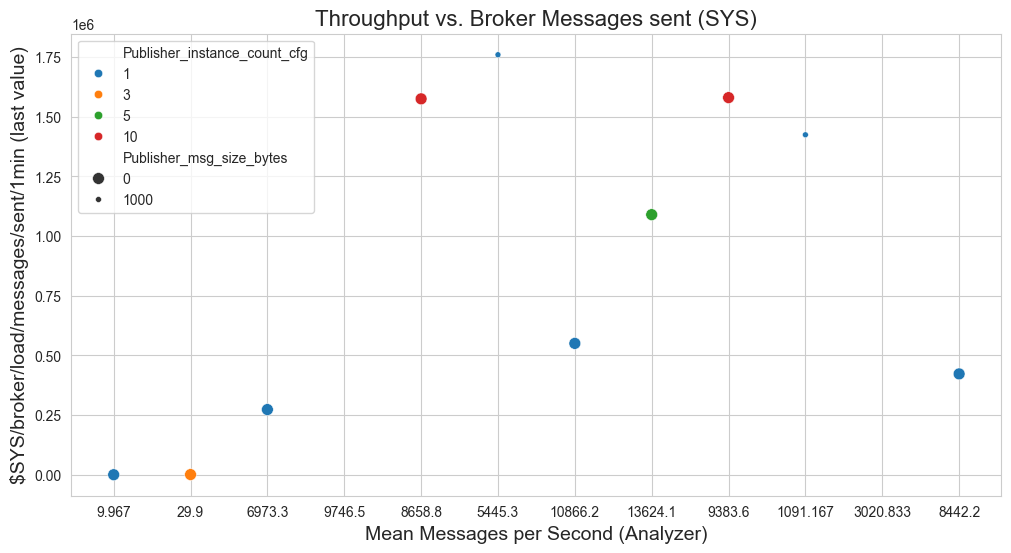

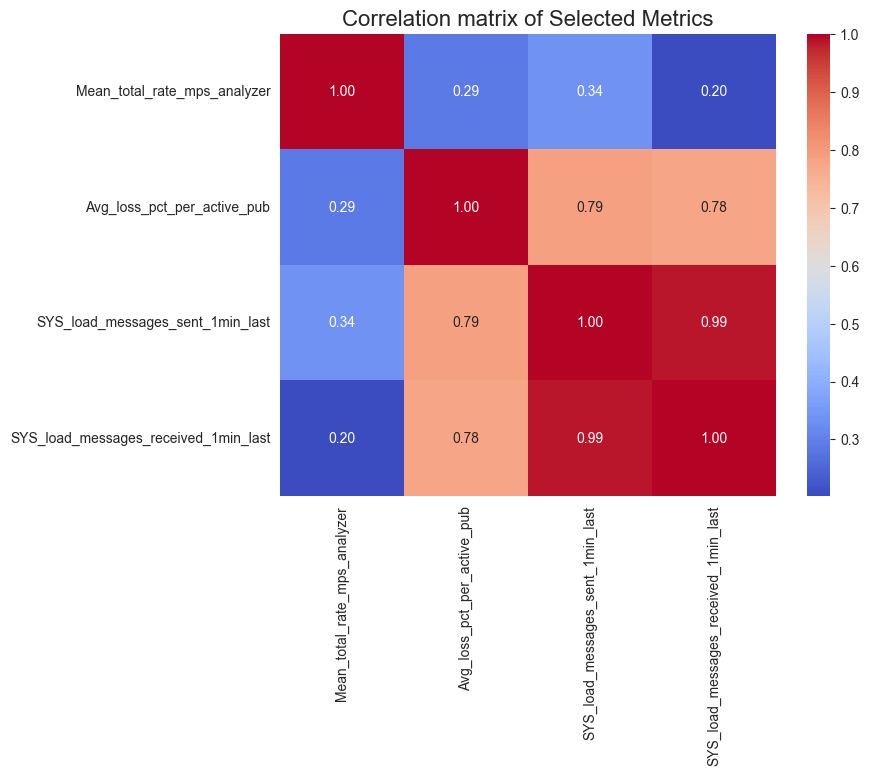

In [76]:
# Correlation with $SYS Topics
sys_cols_for_corr = [
    "SYS_load_messages_received_1min_last",
    "SYS_load_messages_sent_1min_last",
    "SYS_clients_active_last",
    "SYS_subscriptions_count_last",
]
for col in sys_cols_for_corr:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        if col in df_new.columns:
            df_new[col] = pd.to_numeric(df_new[col], errors="coerce")

if 'SYS_load_messages_sent_1min_last' in df_new.columns:
    plt.figure()
    sns.scatterplot(data=df_new,
                    x='Mean_total_rate_mps_analyzer', 
                    y='SYS_load_messages_sent_1min_last', 
                    hue='Publisher_instance_count_cfg', 
                    size='Publisher_msg_size_bytes')
    plt.title('Throughput vs. Broker Messages sent (SYS)')
    plt.xlabel('Mean Messages per Second (Analyzer)')
    plt.ylabel("$SYS/broker/load/messages/sent/1min (last value)")
    plt.show()

    # Corr matrix for selected metrics 
    metrics_for_corr = [
        'Mean_total_rate_mps_analyzer', 'Avg_loss_pct_per_active_pub', 
        'SYS_load_messages_sent_1min_last', 'SYS_load_messages_received_1min_last'
    ]
    # Drop rows with Nan
    df_corr_subset = df_new[metrics_for_corr].dropna()
    if not df_corr_subset.empty:
        correlation_matrix = df_corr_subset.corr()
        plt.figure(figsize=(8,6))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title("Correlation matrix of Selected Metrics")
        plt.show()
    else:
        print("Not enough data for correlation matrix after dropping Nans from selected SYS topics")